# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from sklearn.linear_model import Lasso
from imageio import imread
from datasets import generate_test_data, load_map_data
from preprocessing import polynomial_combinations
from models import OLS, Ridge
from assessment import mse, r_squared, cross_val_mse_and_r_squared
from resampling import train_test_split

# Data generation

In [2]:
data_points = 100
max_degree = 5
noise_scale = 0.1

initial_data, target = generate_test_data(data_points, noise_scale)
X = polynomial_combinations(initial_data, max_degree)

# Part a): Ordinary Least Squares 

In [3]:
ols_regressor = OLS()
ols_regressor.fit(X, target)
# Make predictions on train data:
train_predictions = ols_regressor.predict(X)

I have written some convenience functions to perform assessments:

In [4]:
# Confidence intervals

# MSE and R squared
computed_mse = mse(target, train_predictions)
computed_r_squared = r_squared(target, train_predictions)
print('MSE: {}\nR squared: {}'.format(computed_mse, computed_r_squared))

MSE: 0.6023459074381378
R squared: 0.9425315638585953


## Resampling

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, target)
computed_mse, computed_r_squared = cross_val_mse_and_r_squared(ols_regressor, X, target)
print('MSE obtained using cross validation: {}'.format(computed_mse))
print('R squared obtained using cross validation: {}'.format(computed_r_squared))

MSE obtained using cross validation: 0.5745311851290534
R squared obtained using cross validation: 0.6658862575512887


# Ridge regression

In [6]:
ridge_regressor = Ridge(0.1)
ridge_regressor.fit(X, target)
# Make predictions on train data:
train_predictions = ridge_regressor.predict(X)

In [7]:
# Confidence intervals

# MSE and R squared
computed_mse = mse(target, train_predictions)
computed_r_squared = r_squared(target, train_predictions)
print('MSE: {}\nR squared: {}'.format(computed_mse, computed_r_squared))

MSE: 2.5684214189138963
R squared: 0.7549528261512618


## Resampling

In [8]:
computed_mse, computed_r_squared = cross_val_mse_and_r_squared(ridge_regressor, X, target)
print('MSE obtained using cross validation: {}'.format(computed_mse))
print('R squared obtained using cross validation: {}'.format(computed_r_squared))

MSE obtained using cross validation: 0.5743947647165882
R squared obtained using cross validation: 0.7229211260057401


# Lasso

In [9]:
lasso_regressor = Lasso(0.1)
lasso_regressor.fit(X, target)
train_predictions = lasso_regressor.predict(X)

In [10]:
# Confidence intervals

# MSE and R squared
computed_mse = mse(target, train_predictions)
computed_r_squared = r_squared(target, train_predictions)
print('MSE: {}\nR squared: {}'.format(computed_mse, computed_r_squared))

MSE: 10.481334587842756
R squared: 0.0


In [11]:
computed_mse, computed_r_squared = cross_val_mse_and_r_squared(lasso_regressor, X, target)
print('MSE obtained using cross validation: {}'.format(computed_mse))
print('R squared obtained using cross validation: {}'.format(computed_r_squared))

MSE obtained using cross validation: 2.1156319998094224
R squared obtained using cross validation: -0.034508740478463015


# Part d): Introducing real data
Start by visualizing data:

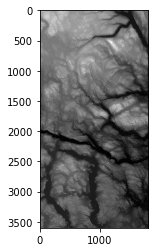

In [13]:
terrain1 = imread('SRTM_data_Norway_1.tif')
plt.figure()
plt.imshow(terrain1, cmap='gray')
plt.show()

In [ ]:
max_degree = 10
initial_data, terrain = load_map_data('SRTM_data_Norway_1.tif')
target = terrain.reshape(-1)

for row in range(10):
    print(initial_data[row], target[row], terrain[initial_data[row, 0], initial_data[row, 1]])

X = polynomial_combinations(initial_data, max_degree)

[0 0] 1161 1161
[1 0] 1165 1168
[2 0] 1169 1172
[3 0] 1172 1176
[4 0] 1175 1180
[5 0] 1178 1183
[6 0] 1182 1185
[7 0] 1187 1187
[8 0] 1192 1189
[9 0] 1196 1193


# Ordinary Least Squares

In [16]:
# This will probably take some time:
ols_regressor = OLS()
ols_regressor.fit(X, target)
# Make predictions on train data:
train_predictions = ols_regressor.predict(X)
# MSE and R squared
computed_mse = mse(target, train_predictions)
computed_r_squared = r_squared(target, train_predictions)
print('MSE: {}\nR squared: {}'.format(computed_mse, computed_r_squared))

MSE: 273013489066.68362
R squared: 0.5429685872444734
